C:\Users\souri\AppData\Local\Temp\ipykernel_6280\1493495681.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2019-01-01', end='2025-01-01')['Close']
[*********************100%***********************]  5 of 5 completed


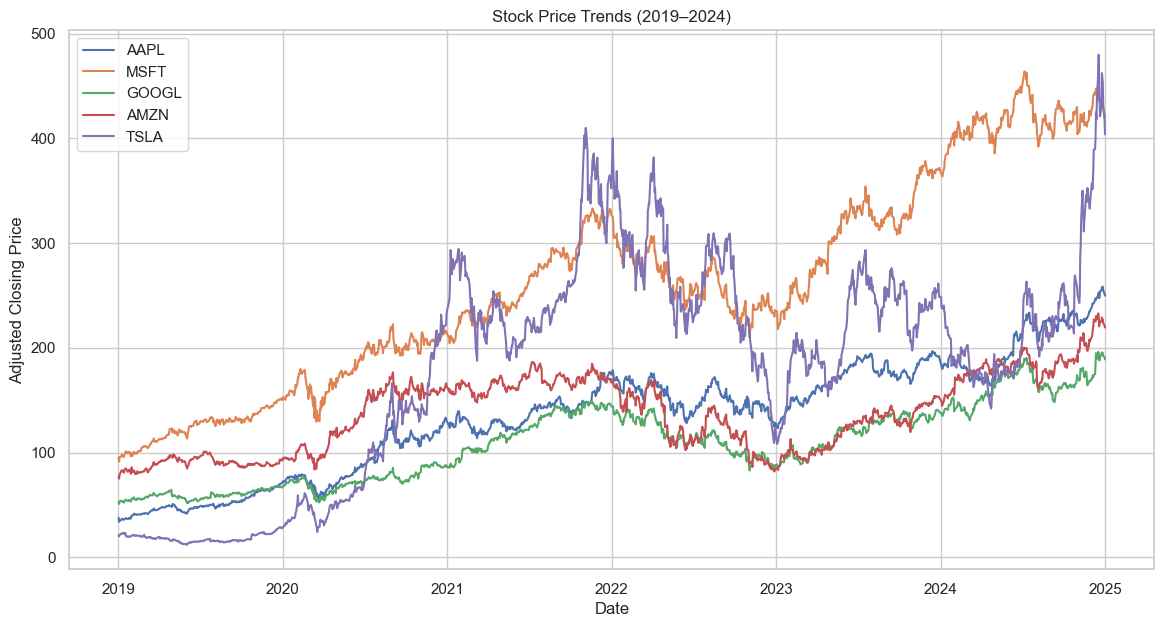

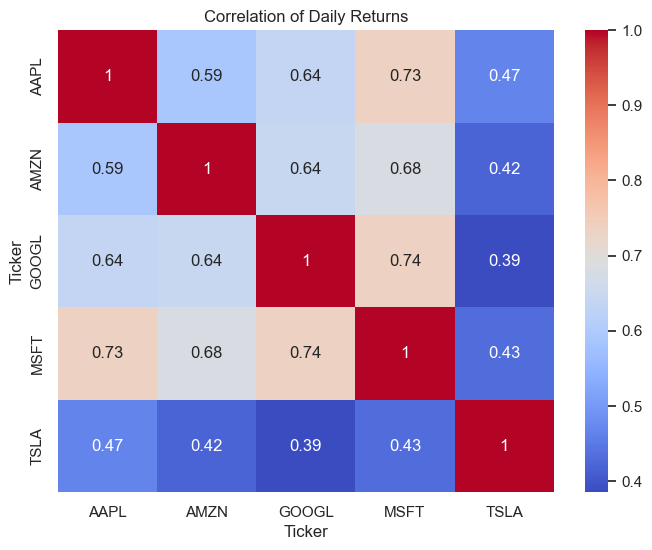

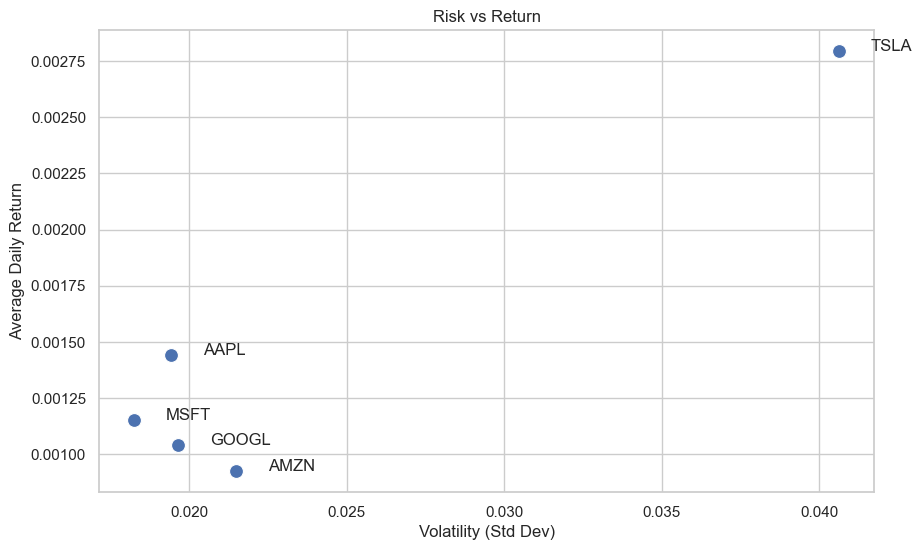

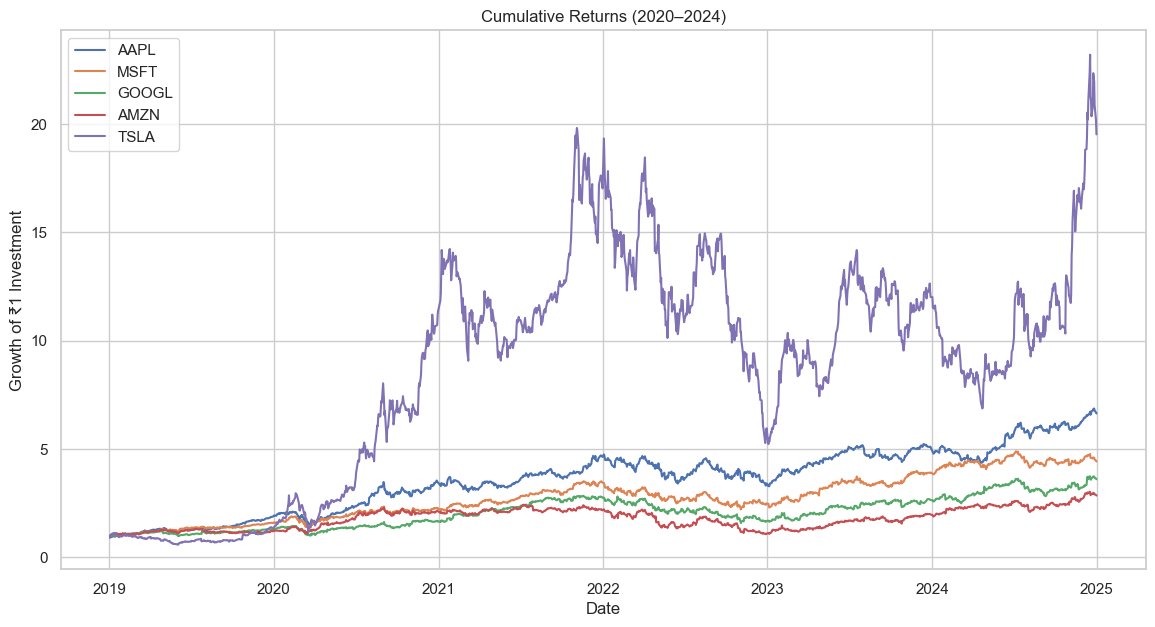

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

sns.set(style="whitegrid")
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
data = yf.download(tickers, start='2019-01-01', end='2025-01-01')['Close']

data.head()

#Plot Stock Price Trends

plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data[ticker], label=ticker)
plt.title('Stock Price Trends (2019–2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()

#Daily Returns + Correlation Heatmap
daily_returns = data.pct_change().dropna()

plt.figure(figsize=(8, 6))
sns.heatmap(daily_returns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Daily Returns')
plt.show()

# Risk vs Return Plot
avg_returns = daily_returns.mean()
volatility = daily_returns.std()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=volatility, y=avg_returns, s=100)
for ticker in tickers:
    plt.text(volatility[ticker]+0.001, avg_returns[ticker], ticker)
plt.title('Risk vs Return')
plt.xlabel('Volatility (Std Dev)')
plt.ylabel('Average Daily Return')
plt.show()

#Cumulative Returns
cumulative_returns = (1 + daily_returns).cumprod()

plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(cumulative_returns[ticker], label=ticker)
plt.title('Cumulative Returns (2020–2024)')
plt.xlabel('Date')
plt.ylabel('Growth of ₹1 Investment')
plt.legend()
plt.show()
